<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/momentum_monthly_3_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Dados com retornos mensais

In [3]:
periodo = '5y'
# carteira de small caps
small = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv',
                    sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , 
                    encoding='latin-1',index_col=False , engine='python')
amplo = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBrA.csv',
                    sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , 
                    encoding='latin-1',index_col=False , engine='python')
lista = (amplo['Código']+'.SA').to_list()+['BOVA11.SA']

In [9]:
preco = yf.download(lista,period=periodo)['Adj Close']

[*********************100%%**********************]  180 of 180 completed

1 Failed download:
['ALOS3.SA']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']")


In [10]:
preco

Ticker,ABCB4.SA,ABEV3.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMBP3.SA,ANIM3.SA,ARML3.SA,...,VBBR3.SA,VIVA3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WEGE3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-31,12.836535,16.524626,NaN,10.548880,NaN,20.473860,19.894718,NaN,7.173333,NaN,...,19.626314,NaN,32.994041,12.170977,5.291330,NaN,11.134670,8.413347,31.913635,20.478621
2019-08-01,12.671873,16.762682,NaN,10.612083,NaN,20.819202,20.217417,NaN,7.083333,NaN,...,19.995234,NaN,33.001377,12.130966,5.261519,NaN,10.952367,8.052775,32.937111,21.275843
2019-08-02,12.786421,16.820148,NaN,10.593122,NaN,20.769867,20.029802,NaN,7.060000,NaN,...,20.105904,NaN,33.426632,11.762876,5.194446,NaN,11.097277,8.024495,32.248592,21.056604
2019-08-05,13.065632,16.549252,NaN,10.504635,NaN,20.523193,19.924738,NaN,7.000000,NaN,...,19.840281,NaN,32.268169,11.482807,5.149730,NaN,10.891598,8.010355,31.373989,20.897161
2019-08-06,13.688488,16.811939,NaN,10.529917,NaN,20.898138,20.254940,NaN,7.340000,NaN,...,19.995234,NaN,32.693436,11.122720,5.403119,NaN,11.172068,8.031564,32.751022,20.887196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,22.309999,11.850000,11.39,26.469999,NaN,8.550000,31.080000,35.310001,3.430000,9.45,...,22.740000,22.600000,48.393646,17.010000,15.280000,2.26,45.950001,5.850000,10.540000,3.344872
2024-07-26,22.360001,11.880000,11.39,26.660000,NaN,8.660000,31.350000,43.869999,3.490000,9.63,...,23.240000,23.160000,48.304379,16.950001,15.560000,2.20,46.919998,5.880000,11.000000,3.473903
2024-07-29,22.379999,11.820000,11.38,26.360001,NaN,8.650000,31.180000,40.169998,3.450000,9.19,...,23.100000,23.110001,48.250000,16.629999,15.560000,2.19,46.480000,5.850000,10.910000,3.510000


In [11]:
# preco.drop(["AESB3.SA","AMBP3.SA","ENGI11.SA","ARML3.SA"],axis=1,inplace=True)
# preco

In [12]:
data = preco.resample('M').last().pct_change()

/tmp/ipykernel_38579/2058251124.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data = preco.resample('M').last().pct_change()


In [13]:
data.tail()

Ticker,ABCB4.SA,ABEV3.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMBP3.SA,ANIM3.SA,ARML3.SA,...,VBBR3.SA,VIVA3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WEGE3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-31,0.026260,-0.007154,-0.022988,0.035413,NaN,-0.062930,0.026192,0.055480,-0.042969,-0.007098,...,-0.032869,-0.223242,-0.071219,-0.010701,-0.028352,-0.272189,0.042671,0.165861,-0.110511,-0.187050
2024-04-30,-0.044573,-0.027222,-0.071569,0.044788,NaN,-0.007345,-0.026190,-0.358974,-0.310204,-0.165063,...,-0.037807,-0.113170,-0.039562,-0.028616,-0.086028,-0.180488,0.035340,-0.007734,-0.179953,0.138643
2024-05-31,-0.067387,-0.048560,0.182682,-0.010522,NaN,0.022199,0.051968,-0.193000,0.029586,0.001914,...,-0.081841,-0.016246,-0.085340,-0.082941,-0.058662,-0.408583,-0.050569,-0.142651,-0.169979,-0.183938
2024-06-30,0.025475,-0.012976,0.016964,0.009846,NaN,-0.056877,0.023728,0.598513,-0.094828,-0.058262,...,-0.029712,-0.039449,0.049527,-0.040958,0.002033,-0.227586,0.123569,-0.040336,-0.140380,0.187302
2024-07-31,0.033482,0.012270,-0.008780,0.024961,NaN,-0.062500,0.034599,2.992248,0.142857,-0.095732,...,0.134431,0.138013,0.077345,0.134034,0.043949,0.022321,0.199936,0.066550,0.049952,-0.101604


In [15]:
def rolling_ret( df , m):
  '''
    df : dataframe com retornos 
    calcula retorno acumulado na janela de m periodos
  '''
  return (df+1).rolling(m).apply(np.prod) - 1 

def get_top( df , date , n=3):
  '''
    determina as colunas de df com os 3 maiores valores na data 'date'
  '''
  top = df.loc[date].nlargest(n).index
  return top.to_list()

def port_ret(df , date ,  port = None):
  '''
    calcula a média em 'df' dos retornos de 'port' na data 'date' 
  '''
  
  if port is None : port = get_top(data , date )

  porta = df.loc[date:,port]
  return porta.mean(axis=1).values[0]

In [16]:
date = '2024-03-31'
# quando rendeu em mar-24 as carteira com as 3 small mais rentáveis
print( date , get_top(data , date) , port_ret( rolling_ret(data,1) , date ))

2024-03-31 ['CLSA3.SA', 'GUAR3.SA', 'EMBR3.SA'] 0.38957958109912744


In [17]:
data.loc[date].nlargest(10)

Ticker
CLSA3.SA    0.421918
GUAR3.SA    0.383333
EMBR3.SA    0.363488
STBP3.SA    0.278320
BRKM5.SA    0.254753
POSI3.SA    0.254068
LAVV3.SA    0.210150
TRIS3.SA    0.189979
TEND3.SA    0.186864
RRRP3.SA    0.180322
Name: 2024-03-31 00:00:00, dtype: float64

### momentum

usando  retornos em janelas moveis

In [28]:
janela = 3
tam_carteira = 3

In [29]:
ret = rolling_ret(data,janela)
ret.tail()

Ticker,ABCB4.SA,ABEV3.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMBP3.SA,ANIM3.SA,ARML3.SA,...,VBBR3.SA,VIVA3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WEGE3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-31,0.005228,-0.090313,-0.172078,-0.080494,NaN,-0.058300,-0.030149,-0.040000,0.098655,-0.261583,...,0.098858,-0.258394,-0.053144,-0.098049,-0.023470,-0.559140,0.045111,-0.001379,-0.192239,-0.405263
2024-04-30,-0.029350,-0.071101,-0.168569,0.040552,NaN,0.102564,0.022668,-0.272198,-0.230068,-0.263876,...,0.013240,-0.333566,-0.053774,-0.125139,-0.124681,-0.500990,0.234950,0.078679,-0.229717,-0.224900
2024-05-31,-0.085557,-0.081081,0.072797,0.070405,NaN,-0.049164,0.051249,-0.453992,-0.320312,-0.169403,...,-0.145592,-0.322338,-0.184090,-0.118716,-0.164036,-0.647250,0.024930,-0.008181,-0.394564,-0.244604
2024-06-30,-0.086257,-0.086469,0.116667,0.043974,NaN,-0.043022,0.048725,-0.173077,-0.357143,-0.212203,...,-0.142803,-0.161994,-0.078018,-0.145669,-0.137894,-0.625632,0.104450,-0.183597,-0.414894,0.103245
2024-07-31,-0.011608,-0.049383,0.192186,0.024162,NaN,-0.096194,0.114189,4.150000,0.065089,-0.146786,...,0.010640,0.075361,0.034209,-0.002618,-0.015294,-0.532985,0.280033,-0.122478,-0.250857,-0.129534


#### próximo mês

In [30]:
date = ret.index[-1].date().strftime("%Y-%m-%d")
prox = ret.loc[date].nlargest(tam_carteira).index.values
print('proxima carteira: ' , *prox)

proxima carteira:  AMBP3.SA JBSS3.SA SBFG3.SA


In [31]:
carteiras = []
for date in ret.index:
    # print(date.date() , get_top( ret , date , tam_carteira), port_ret( data , date ,  get_top( ret , date) ))
    carteiras.append(get_top( ret , date , tam_carteira))

In [32]:
print(*carteiras)

['ABCB4.SA', 'ABEV3.SA', 'AESB3.SA'] ['ABCB4.SA', 'ABEV3.SA', 'AESB3.SA'] ['ABCB4.SA', 'ABEV3.SA', 'AESB3.SA'] ['MRFG3.SA', 'SBFG3.SA', 'TRIS3.SA'] ['POSI3.SA', 'BEEF3.SA', 'DASA3.SA'] ['POSI3.SA', 'AZEV4.SA', 'PRIO3.SA'] ['PRIO3.SA', 'RCSL3.SA', 'AZEV4.SA'] ['RCSL3.SA', 'PRIO3.SA', 'AZEV4.SA'] ['DASA3.SA', 'PNVL3.SA', 'VIVT3.SA'] ['MRFG3.SA', 'PNVL3.SA', 'DASA3.SA'] ['MGLU3.SA', 'SLCE3.SA', 'LWSA3.SA'] ['LWSA3.SA', 'BPAC11.SA', 'AZEV4.SA'] ['EVEN3.SA', 'JHSF3.SA', 'LWSA3.SA'] ['LWSA3.SA', 'EVEN3.SA', 'BPAC11.SA'] ['CSNA3.SA', 'DXCO3.SA', 'RENT3.SA'] ['CSNA3.SA', 'PTBL3.SA', 'LWSA3.SA'] ['RCSL3.SA', 'TASA4.SA', 'AZUL4.SA'] ['RCSL3.SA', 'PRIO3.SA', 'TASA4.SA'] ['DASA3.SA', 'RCSL3.SA', 'TASA4.SA'] ['CASH3.SA', 'DASA3.SA', 'ROMI3.SA'] ['PCAR3.SA', 'DASA3.SA', 'ROMI3.SA'] ['PCAR3.SA', 'POSI3.SA', 'BRKM5.SA'] ['PCAR3.SA', 'POSI3.SA', 'WIZC3.SA'] ['WIZC3.SA', 'AZEV4.SA', 'BPAN4.SA'] ['CASH3.SA', 'AZEV4.SA', 'UGPA3.SA'] ['AMBP3.SA', 'UGPA3.SA', 'LEVE3.SA'] ['MRFG3.SA', 'JBSS3.SA', 'PRIO3.SA']

In [33]:
## a carteira roda no mes seguinte
retornos = [0.0]
for i in range(1,len(data)): 
  # print(data.index[i].date() , carteiras[i-1] , port_ret( data , data.index[i] , carteiras[i-1] ))
  retornos.append(port_ret( data , data.index[i] , carteiras[i-1] ))

In [34]:
compara = pd.DataFrame({'returns' : retornos , 'ibov' : data['BOVA11.SA']} , index=data.index)
compara.ibov.iloc[0] = 0.0
# compara

<Axes: xlabel='Date'>

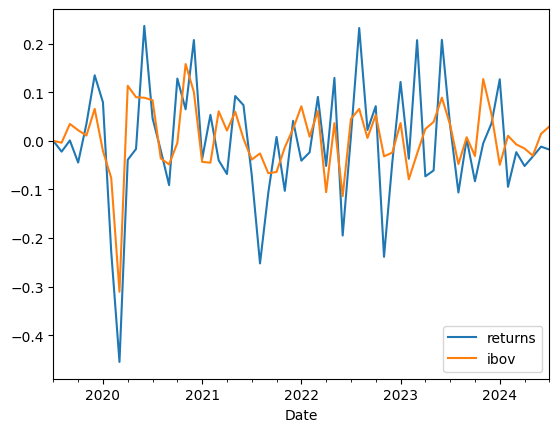

In [35]:
compara.plot()

In [36]:
compara['indice_acum'] = (compara.ibov+1.0).cumprod()
compara['cartei_acum'] = (compara.returns+1.0).cumprod()
compara.tail()

,returns,ibov,indice_acum,cartei_acum
Date,,,,
2024-03-31,-0.023202,-0.007345,1.268932,0.512144
2024-04-30,-0.051720,-0.015684,1.249030,0.485656
2024-05-31,-0.032240,-0.030397,1.211063,0.469998
2024-06-30,-0.011845,0.014495,1.228618,0.464431
2024-07-31,-0.017885,0.029656,1.265054,0.456125


<Axes: xlabel='Date'>

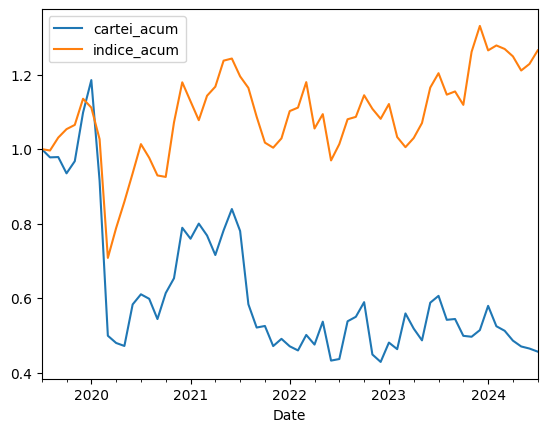

In [37]:
compara[['cartei_acum','indice_acum']].plot()